In [33]:
from __future__ import division
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [34]:
# Sample Dataset
x = [10, 9, 13, 14, 15,8, 9, 10, 11, 12, 9, 0, 8, 8, 25,9,11,10]

(array([1., 0., 0., 7., 6., 2., 1., 0., 0., 1.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <a list of 10 Patch objects>)

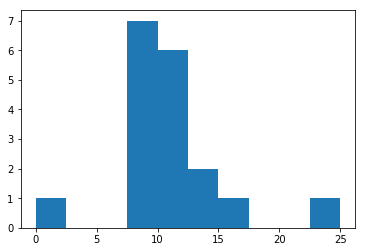

In [35]:
plt.hist(x)

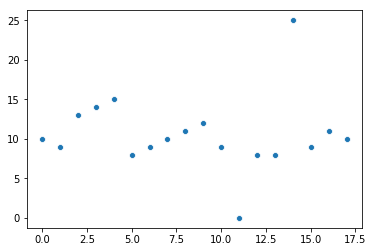

In [36]:
sns.scatterplot(range(0, len(x)), x)

In [37]:
# Median absolute deviation
def mad(data, axis=None):
    return np.mean(np.abs(data - np.mean(data, axis)), axis)

In [38]:
mad = np.abs(x - np.median(x)) / mad(x)

In [39]:
# Standard deviation
sd = np.abs(x - np.mean(x)) / np.std(x)

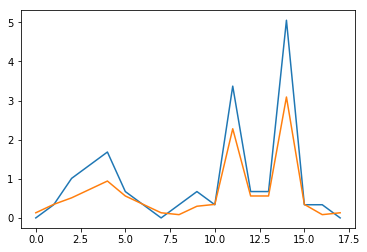

In [40]:
plt.plot(mad)
plt.plot(sd)

In [41]:
mad, sd

(array([0.        , 0.33679834, 1.01039501, 1.34719335, 1.68399168,
        0.67359667, 0.33679834, 0.        , 0.33679834, 0.67359667,
        0.33679834, 3.36798337, 0.67359667, 0.67359667, 5.05197505,
        0.33679834, 0.33679834, 0.        ]),
 array([0.131241  , 0.34599899, 0.51303299, 0.72779098, 0.94254898,
        0.56075699, 0.34599899, 0.131241  , 0.083517  , 0.29827499,
        0.34599899, 2.27882095, 0.56075699, 0.56075699, 3.09012893,
        0.34599899, 0.083517  , 0.131241  ]))

In [42]:
x = pd.DataFrame(x)

In [43]:
x.columns = ['val']

In [44]:
series = x.val

In [45]:
median_val = series.median()
mad_val = series.mad() # Median absolute deviation

zscore_threshold = 3
z_score = (series - median_val) / mad_val
outliers = abs(z_score) > zscore_threshold

series = series.copy()
series = series.loc[~outliers]
# series.loc[z_score > zscore_threshold] = series.loc[~outliers].max()
# series.loc[z_score < -zscore_threshold] = series.loc[~outliers].min() 

# For comparison purposes.
lbound = median_val - zscore_threshold * mad_val
ubound = median_val + zscore_threshold * mad_val

In [46]:
zscore_threshold, lbound, ubound

(3, 1.0925925925925934, 18.907407407407405)

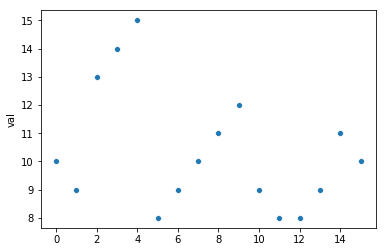

In [47]:
sns.scatterplot(range(0, len(series)), series)

(array([3., 4., 3., 0., 2., 1., 0., 1., 1., 1.]),
 array([ 8. ,  8.7,  9.4, 10.1, 10.8, 11.5, 12.2, 12.9, 13.6, 14.3, 15. ]),
 <a list of 10 Patch objects>)

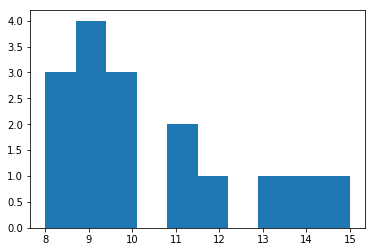

In [48]:
plt.hist(series)